<a href="https://colab.research.google.com/github/OUNNADA/ADV-MAP/blob/master/29_04_2022_dbscan_fire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DBSCAN with Active Fire Data

## 1. Cleaning data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
firedata = pd.read_csv('https://raw.githubusercontent.com/OUNNADA/activefire_northern-th/main/north_activefire.csv')

In [ ]:
firedata.head(15)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,TYPE
0,1,18.527788,100.767578,335.84,0.40,0.37,1/12/2019,636,N,VIIRS,n,1,305.32,3.42,D,0.0
1,2,18.542633,99.069542,332.71,0.38,0.36,1/12/2019,636,N,VIIRS,n,1,303.44,1.78,D,0.0
2,3,20.322203,99.966682,335.23,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.75,2.50,D,0.0
3,4,19.094233,99.956909,340.80,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,301.21,4.19,D,0.0
4,5,19.102425,99.989632,330.30,0.39,0.36,1/12/2019,636,N,VIIRS,l,1,302.02,2.58,D,0.0
5,6,19.369314,100.033173,329.23,0.39,0.36,1/12/2019,636,N,VIIRS,l,1,302.53,3.06,D,0.0
6,7,19.385784,100.099091,336.55,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.96,2.95,D,0.0
7,8,19.384373,100.019341,338.20,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.33,2.82,D,0.0
8,9,18.202717,100.231499,333.53,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,304.36,1.82,D,0.0
9,10,20.325552,99.966133,333.14,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.54,2.52,D,0.0


In [ ]:
firedata.head(20).to_csv('firedata_head.csv')

ตัดเฉพาะแถวที่ confidence เป็น low (l) ออก

In [ ]:
firedata.drop(firedata.loc[firedata['CONFIDENCE']=='l'].index, inplace=True)
firedata = firedata.reset_index(drop=True)

In [ ]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,TYPE
0,1,18.527788,100.767578,335.84,0.40,0.37,1/12/2019,636,N,VIIRS,n,1,305.32,3.42,D,0.0
1,2,18.542633,99.069542,332.71,0.38,0.36,1/12/2019,636,N,VIIRS,n,1,303.44,1.78,D,0.0
2,3,20.322203,99.966682,335.23,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.75,2.50,D,0.0
3,4,19.094233,99.956909,340.80,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,301.21,4.19,D,0.0
4,7,19.385784,100.099091,336.55,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.96,2.95,D,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71487,79086,17.518251,100.285202,346.40,0.51,0.49,30/4/2020,604,N,VIIRS,n,1,295.39,4.93,D,0.0
71488,79087,17.542446,100.017380,334.13,0.53,0.50,30/4/2020,604,N,VIIRS,n,1,295.28,3.12,D,0.0
71489,79088,17.582962,100.010963,330.56,0.53,0.50,30/4/2020,604,N,VIIRS,n,1,295.12,4.89,D,0.0
71490,79089,17.732866,100.646561,334.03,0.48,0.48,30/4/2020,604,N,VIIRS,n,1,297.82,4.22,D,0.0


In [ ]:
firedata.head(20)

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,TYPE
0,1,18.527788,100.767578,335.84,0.40,0.37,1/12/2019,636,N,VIIRS,n,1,305.32,3.42,D,0.0
1,2,18.542633,99.069542,332.71,0.38,0.36,1/12/2019,636,N,VIIRS,n,1,303.44,1.78,D,0.0
2,3,20.322203,99.966682,335.23,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.75,2.50,D,0.0
3,4,19.094233,99.956909,340.80,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,301.21,4.19,D,0.0
4,7,19.385784,100.099091,336.55,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.96,2.95,D,0.0
5,8,19.384373,100.019341,338.20,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.33,2.82,D,0.0
6,9,18.202717,100.231499,333.53,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,304.36,1.82,D,0.0
7,10,20.325552,99.966133,333.14,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.54,2.52,D,0.0
8,11,20.325005,99.962372,332.94,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.79,1.84,D,0.0
9,12,20.324051,99.908676,334.37,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,303.37,2.43,D,0.0


In [ ]:
firedata.iloc[0:10000]

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,TYPE
0,1,18.527788,100.767578,335.84,0.40,0.37,1/12/2019,636,N,VIIRS,n,1,305.32,3.42,D,0.0
1,2,18.542633,99.069542,332.71,0.38,0.36,1/12/2019,636,N,VIIRS,n,1,303.44,1.78,D,0.0
2,3,20.322203,99.966682,335.23,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.75,2.50,D,0.0
3,4,19.094233,99.956909,340.80,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,301.21,4.19,D,0.0
4,7,19.385784,100.099091,336.55,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.96,2.95,D,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10844,17.731941,98.750359,302.21,0.47,0.48,25/1/2020,1835,N,VIIRS,n,1,287.27,0.83,N,0.0
9996,10845,17.598661,100.263290,299.02,0.56,0.43,25/1/2020,1835,N,VIIRS,n,1,284.08,0.79,N,0.0
9997,10846,17.583132,98.729111,300.95,0.47,0.47,25/1/2020,1835,N,VIIRS,n,1,285.20,0.69,N,0.0
9998,10847,17.762686,98.718010,299.37,0.47,0.48,25/1/2020,1835,N,VIIRS,n,1,286.94,0.74,N,0.0


In [ ]:
count_daily_point = firedata.groupby(['ACQ_DATE']).size()
count_daily_point

ACQ_DATE
1/1/2020       50
1/12/2019     133
1/2/2020      106
1/3/2020     1086
1/4/2020     1567
             ... 
9/1/2020      104
9/12/2019      66
9/2/2020      401
9/3/2020      657
9/4/2020      249
Length: 150, dtype: int64

In [ ]:
firedata.head(20).to_csv('firedata_drop_head.csv')

ตัดเอาข้อมูลเฉพาะส่วนที่จะใช้

In [ ]:
firedata_use = ['LATITUDE','LONGITUDE','ACQ_DATE','ACQ_TIME']
firedata[firedata_use ]

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME
0,18.527788,100.767578,1/12/2019,636
1,18.542633,99.069542,1/12/2019,636
2,20.322203,99.966682,1/12/2019,636
3,19.094233,99.956909,1/12/2019,636
4,19.385784,100.099091,1/12/2019,636
...,...,...,...,...
71487,17.518251,100.285202,30/4/2020,604
71488,17.542446,100.017380,30/4/2020,604
71489,17.582962,100.010963,30/4/2020,604
71490,17.732866,100.646561,30/4/2020,604


In [ ]:
firedata[firedata_use].head(30)

,LATITUDE,LONGITUDE,ACQ_DATE,ACQ_TIME
0,18.527788,100.767578,1/12/2019,636
1,18.542633,99.069542,1/12/2019,636
2,20.322203,99.966682,1/12/2019,636
3,19.094233,99.956909,1/12/2019,636
4,19.385784,100.099091,1/12/2019,636
5,19.384373,100.019341,1/12/2019,636
6,18.202717,100.231499,1/12/2019,636
7,20.325552,99.966133,1/12/2019,636
8,20.325005,99.962372,1/12/2019,636
9,20.324051,99.908676,1/12/2019,636


In [ ]:
firedata[firedata_use].head(30).to_csv('firedata_head_use.csv')

In [ ]:
firedata.head()

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,TYPE
0,1,18.527788,100.767578,335.84,0.40,0.37,1/12/2019,636,N,VIIRS,n,1,305.32,3.42,D,0.0
1,2,18.542633,99.069542,332.71,0.38,0.36,1/12/2019,636,N,VIIRS,n,1,303.44,1.78,D,0.0
2,3,20.322203,99.966682,335.23,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.75,2.50,D,0.0
3,4,19.094233,99.956909,340.80,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,301.21,4.19,D,0.0
4,7,19.385784,100.099091,336.55,0.39,0.36,1/12/2019,636,N,VIIRS,n,1,302.96,2.95,D,0.0


ต่อมาจัดการเวลาใหม่ให้สามารถจัดกลุ่มได้ง่ายขึ้น

In [ ]:
firedata['ACQ_DATE'] = pd.to_datetime(firedata['ACQ_DATE'], format='%d/%m/%Y')

ดูแนวโน้มจำนวนจุดของแต่ละวัน

In [ ]:
count_daily = firedata.groupby(['ACQ_DATE']).size()
count_daily

ACQ_DATE
2019-12-01    133
2019-12-02     91
2019-12-03     51
2019-12-04     45
2019-12-05    119
             ... 
2020-04-24    136
2020-04-25      4
2020-04-26      1
2020-04-28     11
2020-04-30     19
Length: 150, dtype: int64

Text(0.5, 0, 'YEAR-MONTH')

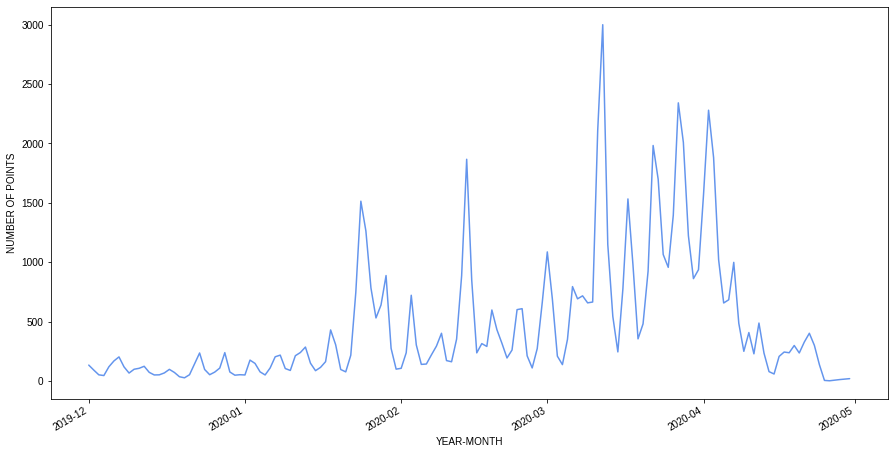

In [ ]:
fig, axs = plt.subplots(figsize=(15, 8))     
plt.style.use("seaborn-white")   
count_daily.plot(ax=axs, color="cornflowerblue")                  
axs.set_ylabel("NUMBER OF POINTS")          
axs.set_xlabel("YEAR-MONTH") 

จัดการแปลงเวลาให้เป็นตัวเลขธรรมดา


1.   นำเวลา(ACQ_DATE) มาแปลงเป็นตัวอักษรก่อน จากนั้นแยกชั่วโมงกับนาทีออกจากกัน
2.   จากนั้นเอาไปรวมกับวัน แล้วสร้างเป็น datetime



In [ ]:
firedata['NEWTIME'] = firedata['ACQ_TIME']
firedata['NEWTIME'] = firedata['NEWTIME'].astype(str).str.zfill(4)
firedata['NEWTIME'] = firedata['NEWTIME'].str.slice(stop=2)+':'+firedata['NEWTIME'].str.slice(start=2)

firedata['NEWTIME'] = pd.to_datetime(firedata['ACQ_DATE'].astype(str)+' '+firedata['NEWTIME'])

นำเวลาของทุกแถวลบเวลาที่น้อยที่สุด โดยให้ผลลัพธ์เป็นจำนวนวัน จะได้วันแรกของข้อมูลเป็น 0 วันที่ 1 เป็น 1 ....

In [ ]:
firedata['datenum'] = (firedata['NEWTIME'] - min(firedata.ACQ_DATE)).astype('timedelta64[D]')

จัดการแยกเวลาเช้า-เย็น

Assign 0 to morning shots

Assign1 to evening shots

In [ ]:
morningmask = firedata['ACQ_TIME']<1000
firedata.loc[morningmask, 'tofday'] = 0
eveningmask = firedata['ACQ_TIME']>1000
firedata.loc[eveningmask, 'tofday'] = 1

คำนวณเวลาใหม่ให้เป็นดังนี้

เช้าวันแรก เป็น 0

เย็นวันแรก เป็น 1

เช้าวันที่สอง เป็น 2

เย็นวันที่สอง เป็น 3

.....

แล้วเก็บเป็นตัวเลขในคอลัมน์ numtime

In [ ]:
firedata['numtime'] = 2*firedata['datenum'] +1+firedata['tofday'] 
firedata['numtime']

0          1.0
1          1.0
2          1.0
3          1.0
4          1.0
         ...  
71487    303.0
71488    303.0
71489    303.0
71490    303.0
71491    303.0
Name: numtime, Length: 71492, dtype: float64

In [ ]:
firedata

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,DAYNIGHT,TYPE,NEWTIME,datenum,tofday,numtime
0,1,18.527788,100.767578,335.84,0.40,0.37,2019-12-01,636,N,VIIRS,n,1,305.32,3.42,D,0.0,2019-12-01 06:36:00,0.0,0.0,1.0
1,2,18.542633,99.069542,332.71,0.38,0.36,2019-12-01,636,N,VIIRS,n,1,303.44,1.78,D,0.0,2019-12-01 06:36:00,0.0,0.0,1.0
2,3,20.322203,99.966682,335.23,0.39,0.36,2019-12-01,636,N,VIIRS,n,1,302.75,2.50,D,0.0,2019-12-01 06:36:00,0.0,0.0,1.0
3,4,19.094233,99.956909,340.80,0.39,0.36,2019-12-01,636,N,VIIRS,n,1,301.21,4.19,D,0.0,2019-12-01 06:36:00,0.0,0.0,1.0
4,7,19.385784,100.099091,336.55,0.39,0.36,2019-12-01,636,N,VIIRS,n,1,302.96,2.95,D,0.0,2019-12-01 06:36:00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71487,79086,17.518251,100.285202,346.40,0.51,0.49,2020-04-30,604,N,VIIRS,n,1,295.39,4.93,D,0.0,2020-04-30 06:04:00,151.0,0.0,303.0
71488,79087,17.542446,100.017380,334.13,0.53,0.50,2020-04-30,604,N,VIIRS,n,1,295.28,3.12,D,0.0,2020-04-30 06:04:00,151.0,0.0,303.0
71489,79088,17.582962,100.010963,330.56,0.53,0.50,2020-04-30,604,N,VIIRS,n,1,295.12,4.89,D,0.0,2020-04-30 06:04:00,151.0,0.0,303.0
71490,79089,17.732866,100.646561,334.03,0.48,0.48,2020-04-30,604,N,VIIRS,n,1,297.82,4.22,D,0.0,2020-04-30 06:04:00,151.0,0.0,303.0


In [ ]:
firedata_newtime = ['LATITUDE','LONGITUDE','numtime']
firedata[firedata_newtime]

,LATITUDE,LONGITUDE,numtime
0,18.527788,100.767578,1.0
1,18.542633,99.069542,1.0
2,20.322203,99.966682,1.0
3,19.094233,99.956909,1.0
4,19.385784,100.099091,1.0
...,...,...,...
71487,17.518251,100.285202,303.0
71488,17.542446,100.017380,303.0
71489,17.582962,100.010963,303.0
71490,17.732866,100.646561,303.0


In [ ]:
firedata[firedata_newtime].to_csv('firedata_newtime.csv')

In [ ]:
firedata_newtime_date= ['LATITUDE','LONGITUDE','numtime','ACQ_DATE']
firedata[firedata_newtime_date]

,LATITUDE,LONGITUDE,numtime,ACQ_DATE
0,18.527788,100.767578,1.0,2019-12-01
1,18.542633,99.069542,1.0,2019-12-01
2,20.322203,99.966682,1.0,2019-12-01
3,19.094233,99.956909,1.0,2019-12-01
4,19.385784,100.099091,1.0,2019-12-01
...,...,...,...,...
71487,17.518251,100.285202,303.0,2020-04-30
71488,17.542446,100.017380,303.0,2020-04-30
71489,17.582962,100.010963,303.0,2020-04-30
71490,17.732866,100.646561,303.0,2020-04-30


In [ ]:
firedata[firedata_newtime_date].to_csv('firedata_newtime_date.csv')

แปลงค่าพิกัดให้เป็น UTM นำค่าพิกัดและเวลาไปเก็บไว้ใน dataframe ใหม่ชื่อ UTM

In [ ]:
!pip install pyproj
from pyproj import CRS
from pyproj import Transformer

     |████████████████████████████████| 6.3 MB 15.6 MB/s 


In [ ]:
transformer = Transformer.from_crs(4326,32647)

In [ ]:
UTMx,UTMy = transformer.transform(firedata["LATITUDE"].values, firedata["LONGITUDE"].values)

In [ ]:
utm = pd.DataFrame({'UTMx': UTMx, 'UTMy': UTMy})
utm['numtime'] = firedata["numtime"].astype(int)
utm

,UTMx,UTMy,numtime
0,686579.655195,2.049494e+06,1
1,507339.054375,2.050223e+06,1
2,600916.309374,2.247433e+06,1
3,600661.442786,2.111529e+06,1
4,615415.567936,2.143882e+06,1
...,...,...,...
71487,636428.934094,1.937349e+06,303
71488,607981.533305,1.939854e+06,303
71489,607276.523893,1.944333e+06,303
71490,674589.541734,1.961396e+06,303


In [ ]:
utm.to_csv('utm.csv')

In [ ]:
import matplotlib.pyplot as plt # for data visualization
import plotly.graph_objects as go # for data visualization
import plotly.express as px # for data visualization

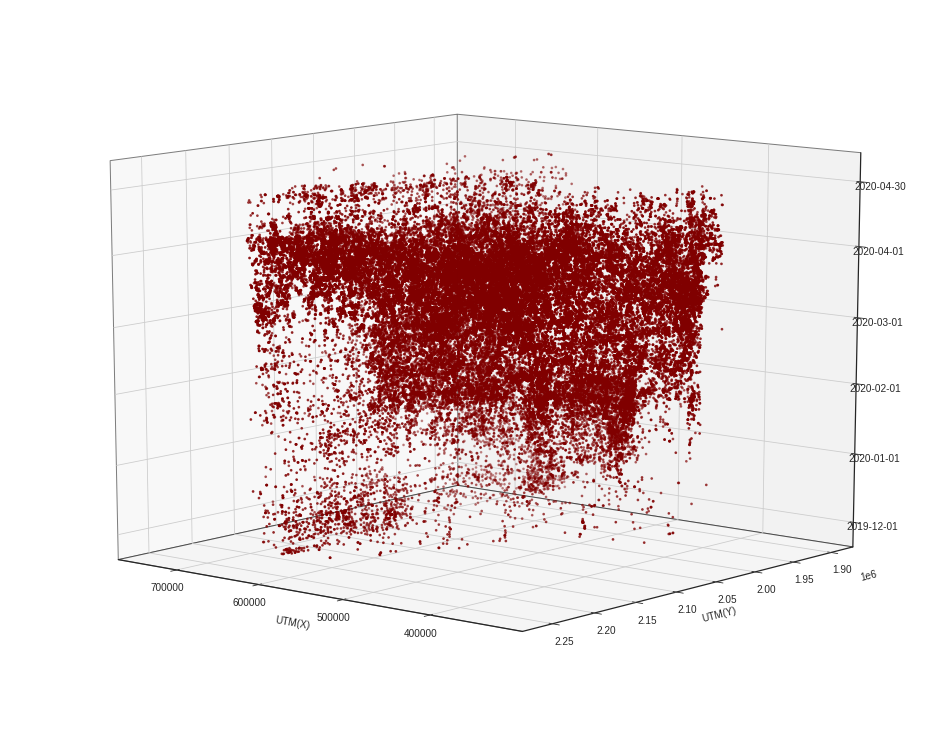

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(utm['UTMx'], utm['UTMy'], utm['numtime'],s=3,color=['maroon'])
ax.view_init(azim=130,elev=12)
ax.set_xlabel('UTM(X)')
ax.set_ylabel('UTM(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

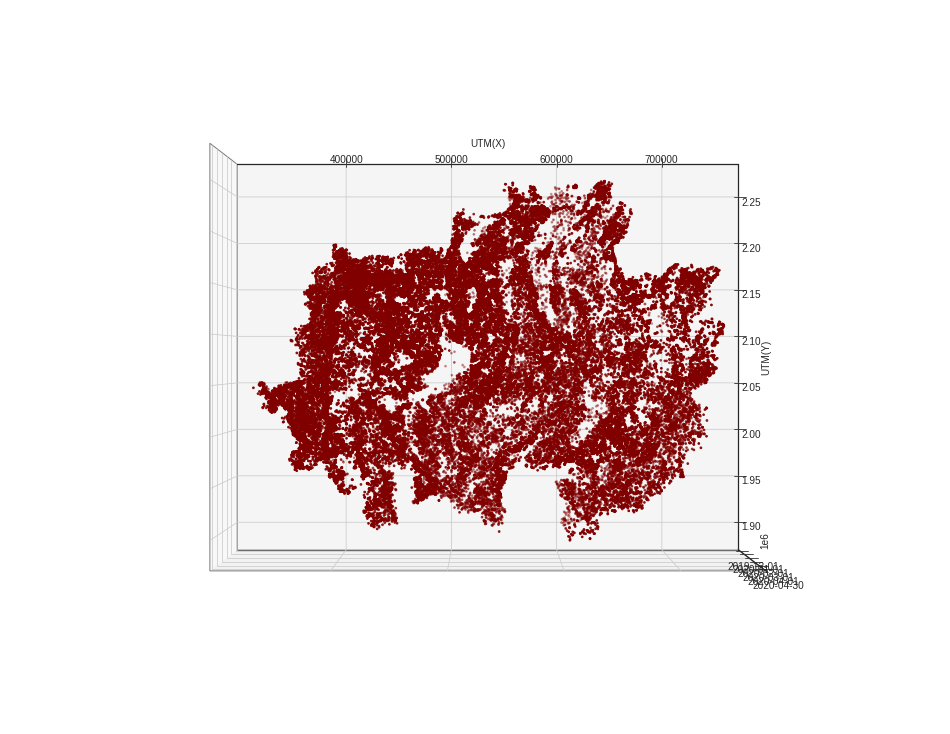

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(utm['UTMx'], utm['UTMy'], utm['numtime'],s=3,color=['maroon'])
ax.view_init(azim=-90,elev=90)
ax.set_xlabel('UTM(X)')
ax.set_ylabel('UTM(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

## 2.DBSCAN

In [ ]:
import numpy as np
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from collections import Counter
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

ทำการ normalizeข้อมูลก่อน DBSCAN

In [ ]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler

# define min max scaler
scaler = MinMaxScaler()

# transform data
utm_scaled = scaler.fit_transform(utm)
print(utm_scaled)

[[0.86566512 0.42196912 0.        ]
 [0.43425586 0.42398465 0.        ]
 [0.65948438 0.96910042 0.        ]
 ...
 [0.6747926  0.13128748 1.        ]
 [0.83680645 0.17845088 1.        ]
 [0.91170781 0.52931524 1.        ]]


In [ ]:
utm_sc = pd.DataFrame(utm_scaled)
utm_sc.columns = ['UTMx_nor', 'UTMy_nor', 'NUMTIME_nor']
utm_sc

,UTMx_nor,UTMy_nor,NUMTIME_nor
0,0.865665,0.421969,0.0
1,0.434256,0.423985,0.0
2,0.659484,0.969100,0.0
3,0.658871,0.593443,0.0
4,0.694382,0.682871,0.0
...,...,...,...
71487,0.744959,0.111982,1.0
71488,0.676489,0.118906,1.0
71489,0.674793,0.131287,1.0
71490,0.836806,0.178451,1.0


In [ ]:
utm

,UTMx,UTMy,numtime
0,686579.655195,2.049494e+06,1
1,507339.054375,2.050223e+06,1
2,600916.309374,2.247433e+06,1
3,600661.442786,2.111529e+06,1
4,615415.567936,2.143882e+06,1
...,...,...,...
71487,636428.934094,1.937349e+06,303
71488,607981.533305,1.939854e+06,303
71489,607276.523893,1.944333e+06,303
71490,674589.541734,1.961396e+06,303


In [ ]:
utm_sc.to_csv('utm_sc.csv')

In [ ]:
utm_nor = pd.concat([utm, utm_sc], axis=1)
utm_nor

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor
0,686579.655195,2.049494e+06,1,0.865665,0.421969,0.0
1,507339.054375,2.050223e+06,1,0.434256,0.423985,0.0
2,600916.309374,2.247433e+06,1,0.659484,0.969100,0.0
3,600661.442786,2.111529e+06,1,0.658871,0.593443,0.0
4,615415.567936,2.143882e+06,1,0.694382,0.682871,0.0
...,...,...,...,...,...,...
71487,636428.934094,1.937349e+06,303,0.744959,0.111982,1.0
71488,607981.533305,1.939854e+06,303,0.676489,0.118906,1.0
71489,607276.523893,1.944333e+06,303,0.674793,0.131287,1.0
71490,674589.541734,1.961396e+06,303,0.836806,0.178451,1.0


- หาจำนวน MinPts ที่เหมาะสมโดย
MinPts = ln(จำนวนจุดทั้งหมด)

In [ ]:
import math
MinPts = math.floor(np.log(len(utm_sc)))
MinPts

11

- หา eps ที่เหมาะสม โดยการ plot กราฟแสดงความสัมพันธ์ระหว่างระยะทางเฉลี่ยกับเพื่อนบ้าน k จุด (k-distance graph) โดย k คือค่า minPts 

- ค่า eps ที่เหมาะสมคือตรงที่เส้นกำลังจะวิ่งขึ้นอย่างรวดเร็ว

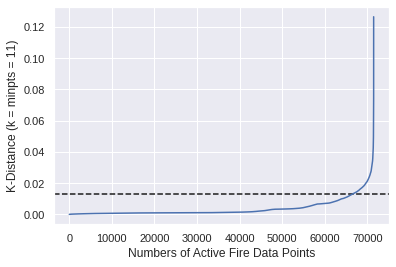

In [ ]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
neighbors = NearestNeighbors(n_neighbors=MinPts)
neighbors_fit = neighbors.fit(utm_sc)
distances, indices = neighbors_fit.kneighbors(utm_sc)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.013, color='k', linestyle='dashed')
plt.style.use("seaborn-white")  
plt.rcParams['figure.figsize'] = [10,6]
plt.xlabel('Numbers of Active Fire Data Points')
plt.ylabel('K-Distance (k = minpts = 11)')
plt.plot(distances)

- ทำการทดสอบโดยใช้ DBSCAN

In [ ]:
model = DBSCAN(eps=0.013, min_samples=11)
pred = model.fit_predict(utm_nor[['UTMx_nor','UTMy_nor','NUMTIME_nor']])
labels = model.labels_
n_noise_ = list(labels).count(2)

In [ ]:
print("number of cluster found: {}".format(len(set(model.labels_))))
print('cluster for each point: ', model.labels_)
print('Estimated number of noise points: %d' % n_noise_)
#print("Silhouette Coefficient: %0.5f" % metrics.silhouette_score(utm_sc, labels))

number of cluster found: 961
cluster for each point:  [-1 -1  0 ... -1 -1 -1]
Estimated number of noise points: 49


In [ ]:
utm_nor['label'] = labels
utm_nor

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
0,686579.655195,2.049494e+06,1,0.865665,0.421969,0.0,-1
1,507339.054375,2.050223e+06,1,0.434256,0.423985,0.0,-1
2,600916.309374,2.247433e+06,1,0.659484,0.969100,0.0,0
3,600661.442786,2.111529e+06,1,0.658871,0.593443,0.0,-1
4,615415.567936,2.143882e+06,1,0.694382,0.682871,0.0,-1
...,...,...,...,...,...,...,...
71487,636428.934094,1.937349e+06,303,0.744959,0.111982,1.0,-1
71488,607981.533305,1.939854e+06,303,0.676489,0.118906,1.0,-1
71489,607276.523893,1.944333e+06,303,0.674793,0.131287,1.0,-1
71490,674589.541734,1.961396e+06,303,0.836806,0.178451,1.0,-1


In [ ]:
#sub_data=UTM.loc[(UTM['label'] < 20) & (UTM['label'] >0)]
group_data = utm_nor.loc[utm_nor['label']>0]
group_data

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
59,618917.352406,1.916581e+06,1,0.702811,0.054578,0.000000,2
75,623018.111172,1.932584e+06,1,0.712681,0.098812,0.000000,1
116,616897.260452,1.914374e+06,1,0.697948,0.048477,0.000000,2
117,615389.814169,1.916390e+06,1,0.694320,0.054050,0.000000,2
118,618564.804423,1.918784e+06,1,0.701962,0.060666,0.000000,2
...,...,...,...,...,...,...,...
71445,407947.849327,1.958722e+06,292,0.195034,0.171061,0.963576,959
71446,407852.974516,1.958316e+06,292,0.194806,0.169939,0.963576,959
71447,408300.078052,1.958249e+06,292,0.195882,0.169754,0.963576,959
71448,408205.950076,1.957843e+06,292,0.195655,0.168631,0.963576,959


In [ ]:
group_data['label'].value_counts()

623    1914
556    1024
401     677
372     593
55      494
       ... 
727       7
920       7
757       6
713       6
874       1
Name: label, Length: 959, dtype: int64

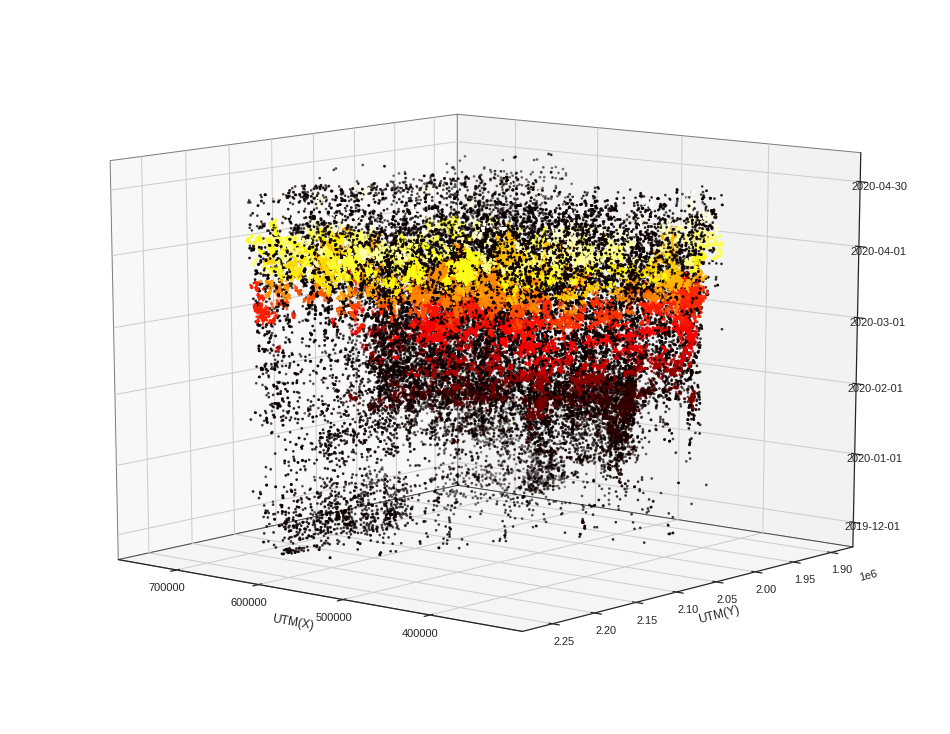

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(utm_nor['UTMx'], utm_nor['UTMy'], utm_nor['numtime'],c=utm_nor['label'],  s=3, cmap = cm.hot)
ax.view_init(azim=130,elev=12)
ax.set_xlabel('UTM(X)')
ax.set_ylabel('UTM(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

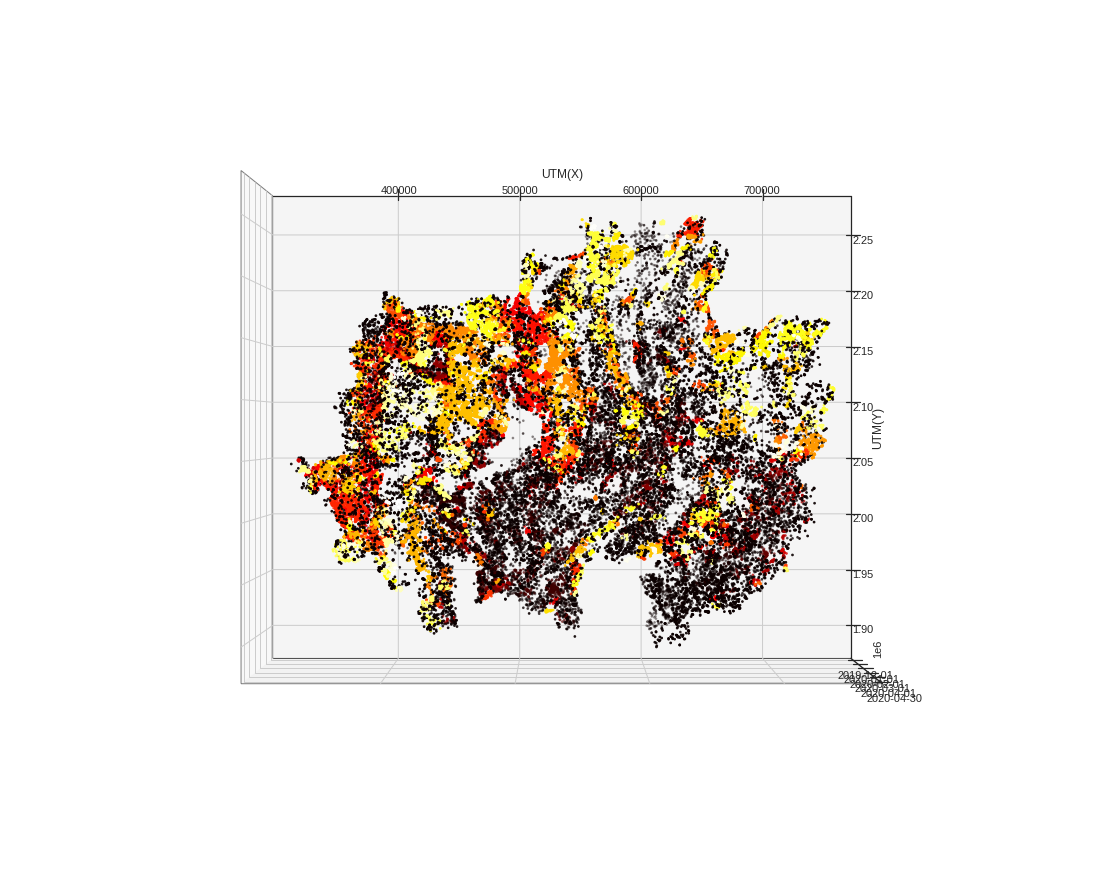

In [ ]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,12))
ax = Axes3D(fig)
ax.scatter(utm_nor['UTMx'], utm_nor['UTMy'], utm_nor['numtime'],c=utm_nor['label'],  s=3, cmap = cm.hot)
ax.view_init(azim=-90,elev=90)
ax.set_xlabel('UTM(X)')
ax.set_ylabel('UTM(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

ตัด noise ออก เพราะในรูปคือ noise สีดำ

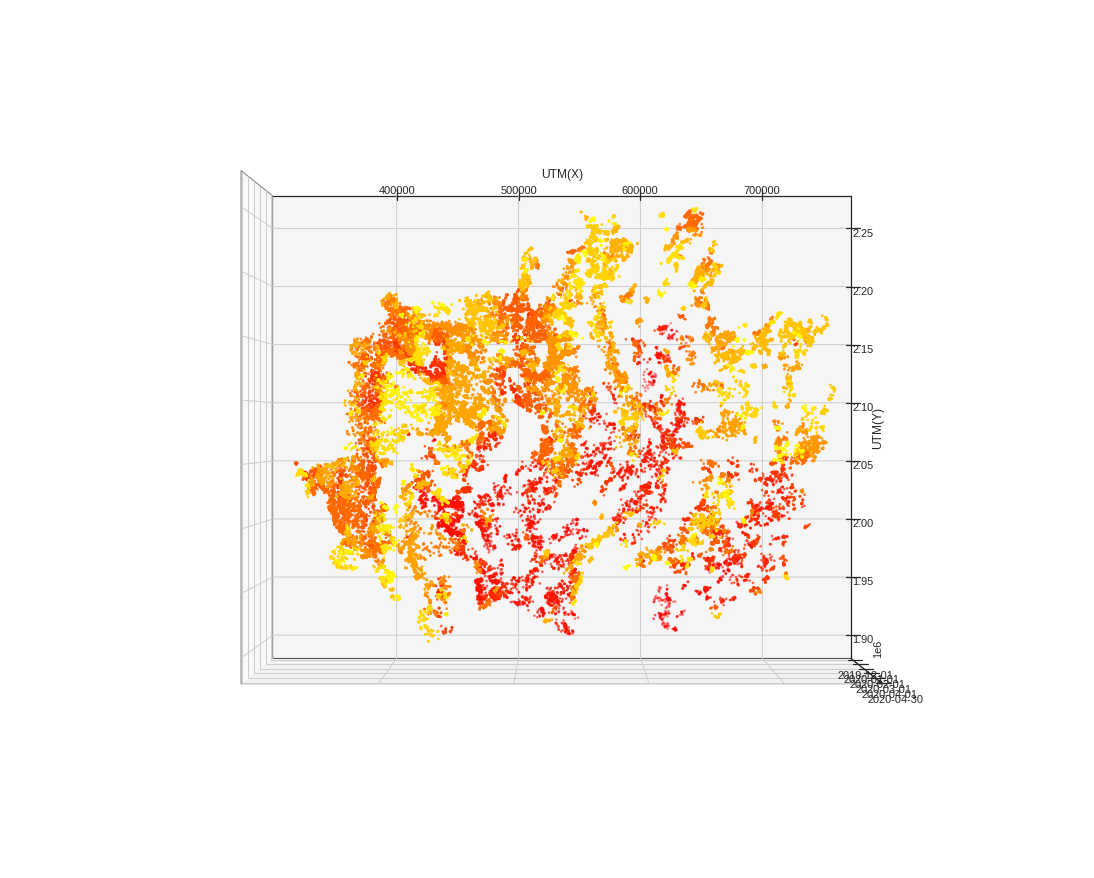

In [ ]:
fig = plt.figure(figsize=(15,12))
ax = Axes3D(fig)
ax.scatter(group_data['UTMx'], group_data['UTMy'], group_data['numtime'],c=group_data['label'],  s=3, cmap = cm.autumn,label=group_data['label'])
ax.view_init(azim=-90,elev=90)
ax.set_xlabel('UTM(X)')
ax.set_ylabel('UTM(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

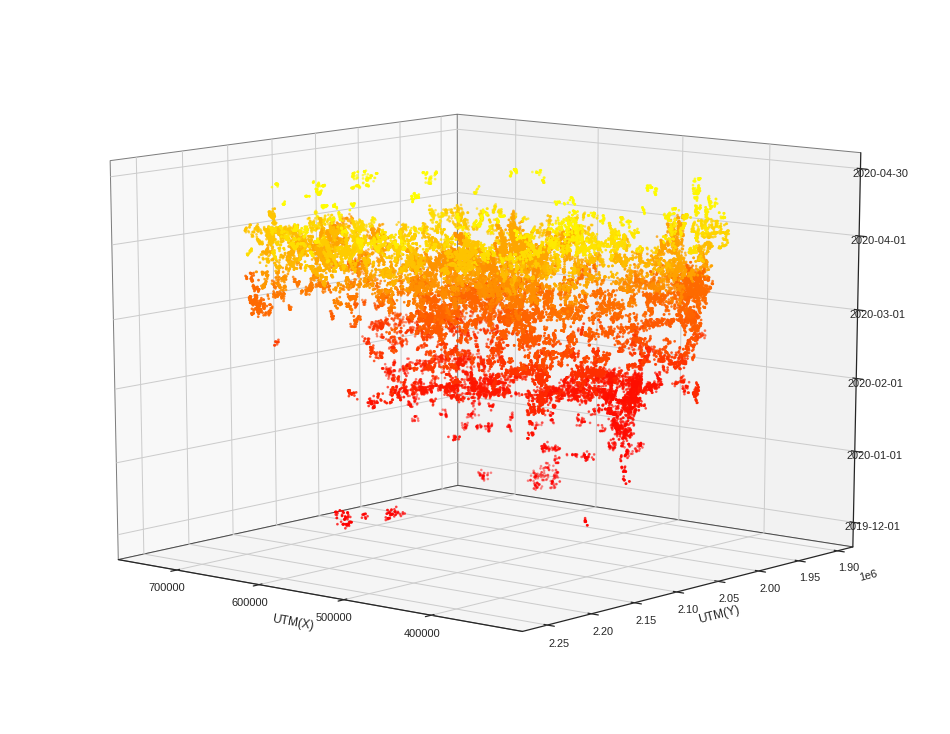

In [ ]:
fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(group_data['UTMx'], group_data['UTMy'], group_data['numtime'],c=group_data['label'],  s=3, cmap=plt.cm.autumn)
ax.view_init(azim=130,elev=12)
ax.set_xlabel('UTM(X)')
ax.set_ylabel('UTM(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

ลองหากลุ่มที่มีข้อมูลมากที่สุด

In [ ]:
group_data['label'].value_counts().head()

623    1914
556    1024
401     677
372     593
55      494
Name: label, dtype: int64

เลือกกลุ่มข้อมูลที่มากที่สุดออกมา

In [ ]:
condition_1 = group_data['label'] == 623
group_data[condition_1]

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
42599,441984.732023,2.105557e+06,223,0.276956,0.576936,0.735099,623
42664,442460.702542,2.073785e+06,223,0.278102,0.489112,0.735099,623
42804,437457.769091,2.071840e+06,223,0.266061,0.483737,0.735099,623
42805,437397.162471,2.072255e+06,223,0.265915,0.484883,0.735099,623
42892,451741.130967,2.095260e+06,224,0.300439,0.548472,0.738411,623
...,...,...,...,...,...,...,...
68792,455679.237379,2.147877e+06,270,0.309917,0.693914,0.890728,623
68794,452575.492666,2.150308e+06,270,0.302447,0.700634,0.890728,623
68801,462015.758742,2.142618e+06,270,0.325168,0.679376,0.890728,623
68923,464387.227400,2.124169e+06,270,0.330876,0.628381,0.890728,623


In [ ]:
pip install pyshp

     |████████████████████████████████| 44 kB 1.4 MB/s 


In [ ]:
import shapefile
!apt install gdal-bin python-gdal python3-gdal 
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes 
!pip install folium
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python3-gdal python3-numpy
0 upgraded, 2 newly installed, 0 to remove and 42 not upgraded.
Need to get 2,288 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-numpy amd64 1:1.13.3-2ubuntu1 [1,943 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python3-gdal amd64 2.2.3+dfsg-2 [346 kB]
Fetched 2,288 kB in 0s (17.5 MB/s)
Sel

In [ ]:
!pip install geopandas
import geopandas as gp

     |████████████████████████████████| 1.0 MB 14.4 MB/s 
     |████████████████████████████████| 16.7 MB 43.8 MB/s 


In [ ]:
north_data = gp.read_file('https://github.com/OUNNADA/data_north_thai/blob/main/north.zip?raw=true')

จุดความร้อนที่แสดงทั้งหมด

<function matplotlib.pyplot.show>

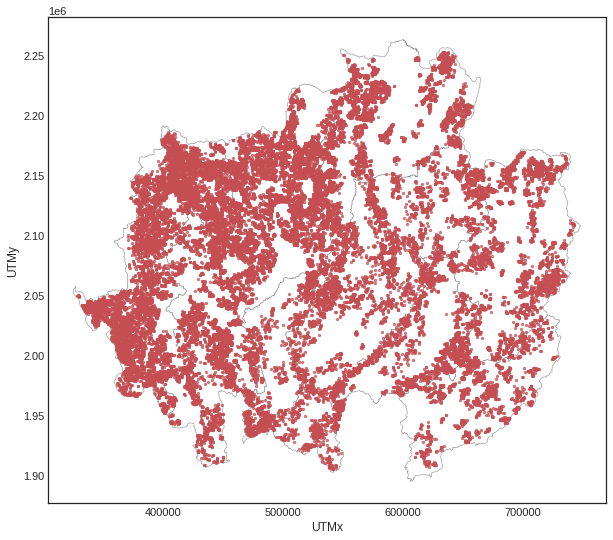

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
north_data.plot(ax=ax,color='white',linewidth=0.5,edgecolor='grey',zorder=1)
x,y = group_data['UTMx'].values, group_data['UTMy'].values
ax.scatter(x,y,color='r', alpha=0.7, zorder=5, s=5 )
plt.xlabel('UTMx') 
plt.ylabel('UTMy') 
plt.show

กลุ่มที่จุดความร้อนมากที่สุด

In [ ]:
group_data[condition_1]

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
42599,441984.732023,2.105557e+06,223,0.276956,0.576936,0.735099,623
42664,442460.702542,2.073785e+06,223,0.278102,0.489112,0.735099,623
42804,437457.769091,2.071840e+06,223,0.266061,0.483737,0.735099,623
42805,437397.162471,2.072255e+06,223,0.265915,0.484883,0.735099,623
42892,451741.130967,2.095260e+06,224,0.300439,0.548472,0.738411,623
...,...,...,...,...,...,...,...
68792,455679.237379,2.147877e+06,270,0.309917,0.693914,0.890728,623
68794,452575.492666,2.150308e+06,270,0.302447,0.700634,0.890728,623
68801,462015.758742,2.142618e+06,270,0.325168,0.679376,0.890728,623
68923,464387.227400,2.124169e+06,270,0.330876,0.628381,0.890728,623


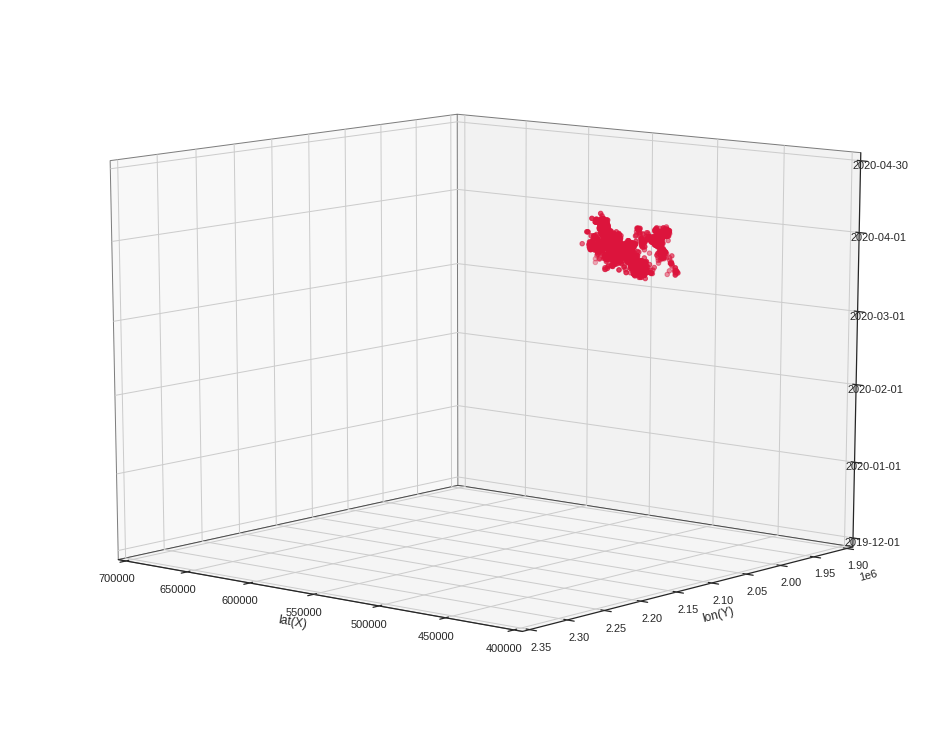

In [ ]:
fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(group_data[condition_1]['UTMx'], group_data[condition_1]['UTMy'],group_data[condition_1]['numtime'],color=['crimson'])
ax.view_init(azim=130,elev=12)
ax.set_xlim(400000,700000)
ax.set_ylim(1900000,2350000)
ax.set_zlim(0,10)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

<function matplotlib.pyplot.show>

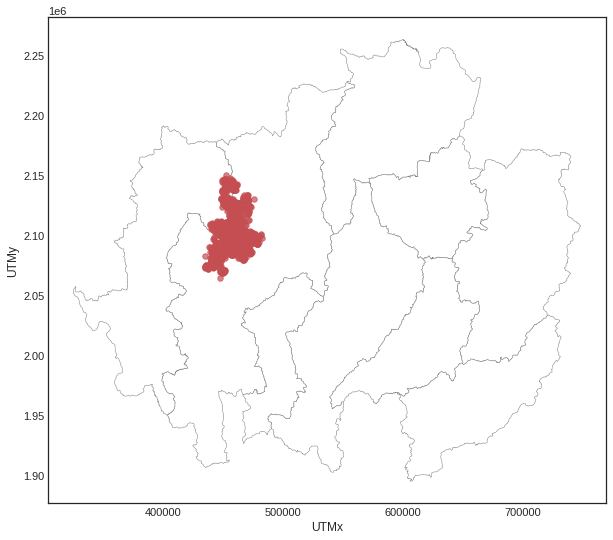

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
north_data.plot(ax=ax,color='white',linewidth=0.5,edgecolor='grey',zorder=1)
x,y = group_data[condition_1]['UTMx'].values, group_data[condition_1]['UTMy'].values
ax.scatter(x,y,color='r', alpha=0.7, zorder=5, s=30 )
plt.xlabel('UTMx') 
plt.ylabel('UTMy') 
plt.show

In [ ]:
group_data[condition_1]

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
42599,441984.732023,2.105557e+06,223,0.276956,0.576936,0.735099,623
42664,442460.702542,2.073785e+06,223,0.278102,0.489112,0.735099,623
42804,437457.769091,2.071840e+06,223,0.266061,0.483737,0.735099,623
42805,437397.162471,2.072255e+06,223,0.265915,0.484883,0.735099,623
42892,451741.130967,2.095260e+06,224,0.300439,0.548472,0.738411,623
...,...,...,...,...,...,...,...
68792,455679.237379,2.147877e+06,270,0.309917,0.693914,0.890728,623
68794,452575.492666,2.150308e+06,270,0.302447,0.700634,0.890728,623
68801,462015.758742,2.142618e+06,270,0.325168,0.679376,0.890728,623
68923,464387.227400,2.124169e+06,270,0.330876,0.628381,0.890728,623


In [ ]:
group_1 = group_data[condition_1]
group_1

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
42599,441984.732023,2.105557e+06,223,0.276956,0.576936,0.735099,623
42664,442460.702542,2.073785e+06,223,0.278102,0.489112,0.735099,623
42804,437457.769091,2.071840e+06,223,0.266061,0.483737,0.735099,623
42805,437397.162471,2.072255e+06,223,0.265915,0.484883,0.735099,623
42892,451741.130967,2.095260e+06,224,0.300439,0.548472,0.738411,623
...,...,...,...,...,...,...,...
68792,455679.237379,2.147877e+06,270,0.309917,0.693914,0.890728,623
68794,452575.492666,2.150308e+06,270,0.302447,0.700634,0.890728,623
68801,462015.758742,2.142618e+06,270,0.325168,0.679376,0.890728,623
68923,464387.227400,2.124169e+06,270,0.330876,0.628381,0.890728,623


In [ ]:
group_1.to_csv('group_1.csv')

เริ่มวันแรก 21/03/2020                                        สิ้นสุด 14/04/2020

In [ ]:
count_points_1 = group_1.groupby(['numtime']).size()
count_points_1

numtime
223      4
224     11
225     22
226     85
227     19
228     60
229     15
230     33
231     27
232     36
233     51
234     35
235     95
236    153
237     36
238    108
239     10
240     59
241     32
242     33
243     15
244     54
245     66
246    116
247     42
248    159
249     36
250     98
251     18
252     50
253     22
254     35
255     36
256     38
257     35
258     64
259      4
260     25
262     10
263      6
264     24
265      1
266      4
267      5
268     20
270      6
272      1
dtype: int64

([<matplotlib.axis.XTick at 0x7f1a0e801810>,
 [Text(0, 0, '21/03/2020'),
  Text(0, 0, '28/03/2020'),
  Text(0, 0, '01/04/2020'),
  Text(0, 0, '08/04/2020'),
  Text(0, 0, '14/04/2020')])

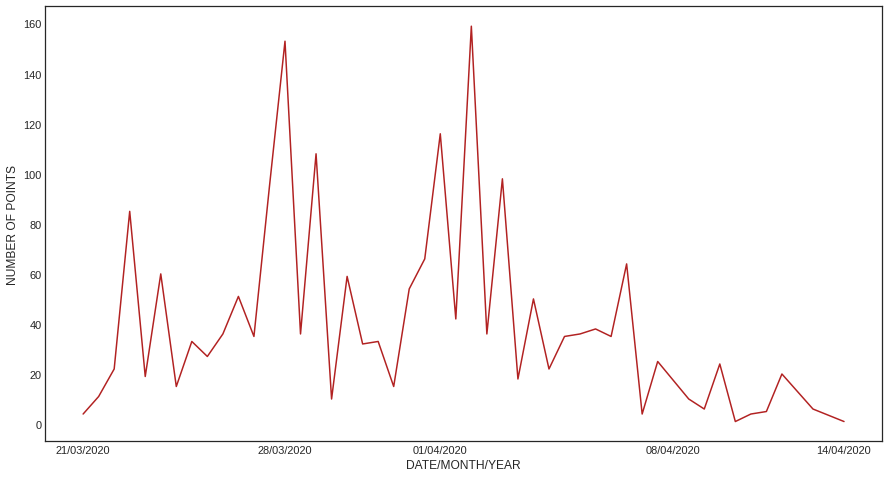

In [ ]:
fig, axs = plt.subplots(figsize=(15, 8))     
plt.style.use("seaborn-white")   
count_points_1.plot(ax=axs, color="firebrick")                  
axs.set_ylabel("NUMBER OF POINTS")          
axs.set_xlabel("DATE/MONTH/YEAR") 
plt.xticks([223, 236,246,261, 272], ["21/03/2020","28/03/2020", "01/04/2020", "08/04/2020", "14/04/2020"],)

In [ ]:
count_points_1.to_csv('count_points_1.csv')

กลุ่มที่มีข้อมูลจุดความร้อนอันดับ 2 

In [ ]:
condition_2 = group_data['label'] == 556
group_data[condition_2]

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
38695,540991.719891,2.149054e+06,214,0.515254,0.697168,0.705298,556
39258,539120.327090,2.138545e+06,215,0.510749,0.668119,0.708609,556
39259,538730.994600,2.138478e+06,215,0.509812,0.667935,0.708609,556
39260,540224.156932,2.139113e+06,215,0.513406,0.669688,0.708609,556
39374,522499.199253,2.128274e+06,215,0.470744,0.639727,0.708609,556
...,...,...,...,...,...,...,...
64850,537229.411934,2.115144e+06,253,0.506198,0.603435,0.834437,556
64851,533690.880523,2.112946e+06,253,0.497681,0.597359,0.834437,556
64886,537654.679011,2.115165e+06,254,0.507222,0.603493,0.837748,556
65106,537688.180322,2.115240e+06,254,0.507302,0.603700,0.837748,556


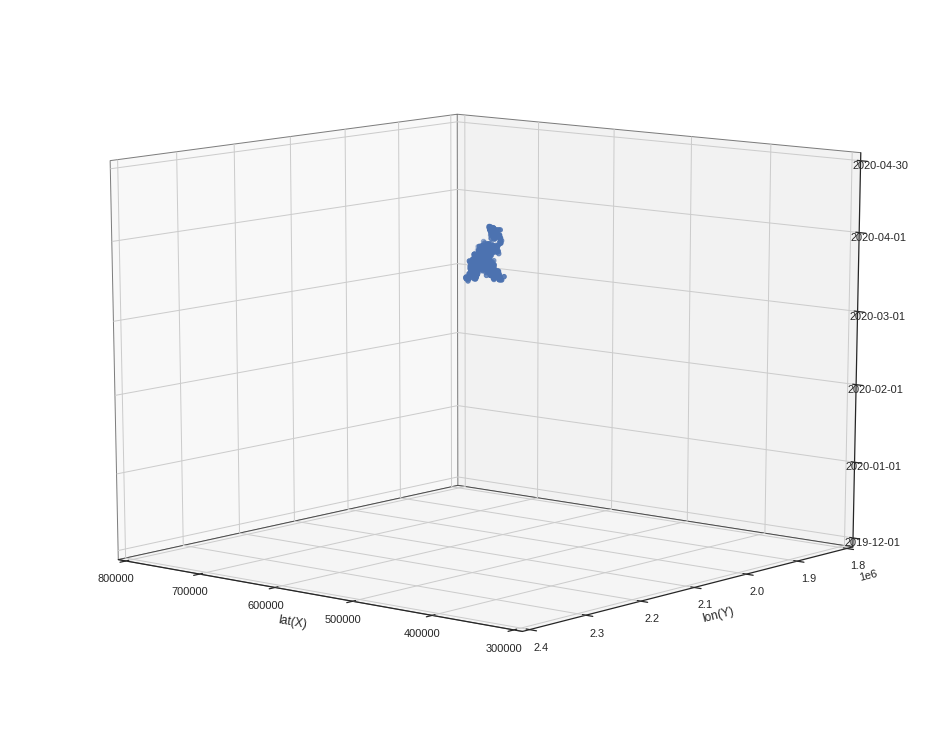

In [ ]:
fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(group_data[condition_2]['UTMx'], group_data[condition_2]['UTMy'],group_data[condition_2]['numtime'])
ax.view_init(azim=130,elev=12)
ax.set_xlim(300000,800000)
ax.set_ylim(1800000,2400000)
ax.set_zlim(0,10)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

<function matplotlib.pyplot.show>

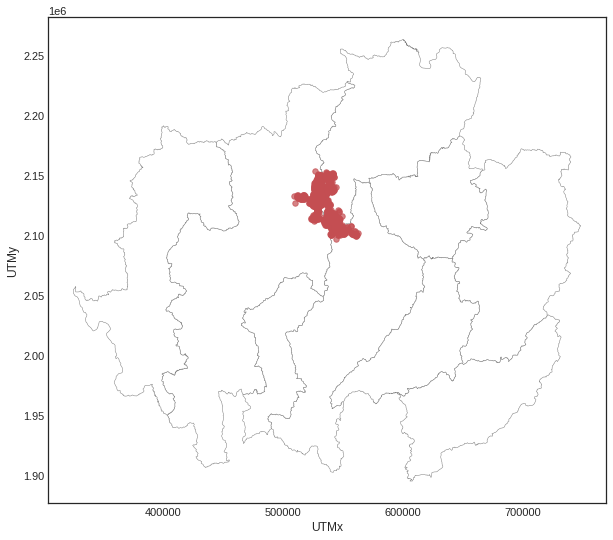

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
north_data.plot(ax=ax,color='white',linewidth=0.5,edgecolor='grey',zorder=1)
x,y = group_data[condition_2]['UTMx'].values, group_data[condition_2]['UTMy'].values
ax.scatter(x,y,color='r', alpha=0.7, zorder=5, s=30 )
plt.xlabel('UTMx') 
plt.ylabel('UTMy') 
plt.show

In [ ]:
group_2 = group_data[condition_2]
group_2

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
38695,540991.719891,2.149054e+06,214,0.515254,0.697168,0.705298,556
39258,539120.327090,2.138545e+06,215,0.510749,0.668119,0.708609,556
39259,538730.994600,2.138478e+06,215,0.509812,0.667935,0.708609,556
39260,540224.156932,2.139113e+06,215,0.513406,0.669688,0.708609,556
39374,522499.199253,2.128274e+06,215,0.470744,0.639727,0.708609,556
...,...,...,...,...,...,...,...
64850,537229.411934,2.115144e+06,253,0.506198,0.603435,0.834437,556
64851,533690.880523,2.112946e+06,253,0.497681,0.597359,0.834437,556
64886,537654.679011,2.115165e+06,254,0.507222,0.603493,0.837748,556
65106,537688.180322,2.115240e+06,254,0.507302,0.603700,0.837748,556


In [ ]:
group_2.to_csv('group_2.csv')

เริ่มวันแรก 16/03/2020
สิ้นสุด 05/04/2020

In [ ]:
count_points_2 = group_2.groupby(['numtime']).size()
count_points_2

numtime
214      1
215      4
216     30
217     16
218     22
219     19
220     26
222     42
223     25
224     46
225     29
226    110
227     21
228     90
229     16
230     47
231     13
232     68
233     52
234     44
235     36
236     65
238     56
239      1
240     26
241      1
242      2
243      3
244      9
245      2
246     11
247      2
248     23
249      8
250     21
251      7
252     22
253      5
254      3
dtype: int64

กลุ่มที่มีข้อมูลจุดความร้อนอันดับ 3

In [ ]:
condition_3 = group_data['label'] == 401
group_data[condition_3]

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
27703,365334.614550,1.997398e+06,193,0.092469,0.277967,0.635762,401
27704,364923.035262,1.997333e+06,193,0.091479,0.277788,0.635762,401
27705,364868.357100,1.997708e+06,193,0.091347,0.278823,0.635762,401
27877,364829.153256,1.997763e+06,193,0.091253,0.278977,0.635762,401
27878,364773.529963,1.998138e+06,193,0.091119,0.280014,0.635762,401
...,...,...,...,...,...,...,...
46964,378127.836687,2.005380e+06,228,0.123261,0.300031,0.751656,401
46965,378618.213974,2.005308e+06,228,0.124441,0.299833,0.751656,401
48007,376561.877895,2.009073e+06,230,0.119492,0.310237,0.758278,401
48008,377003.317099,2.002542e+06,230,0.120554,0.292185,0.758278,401


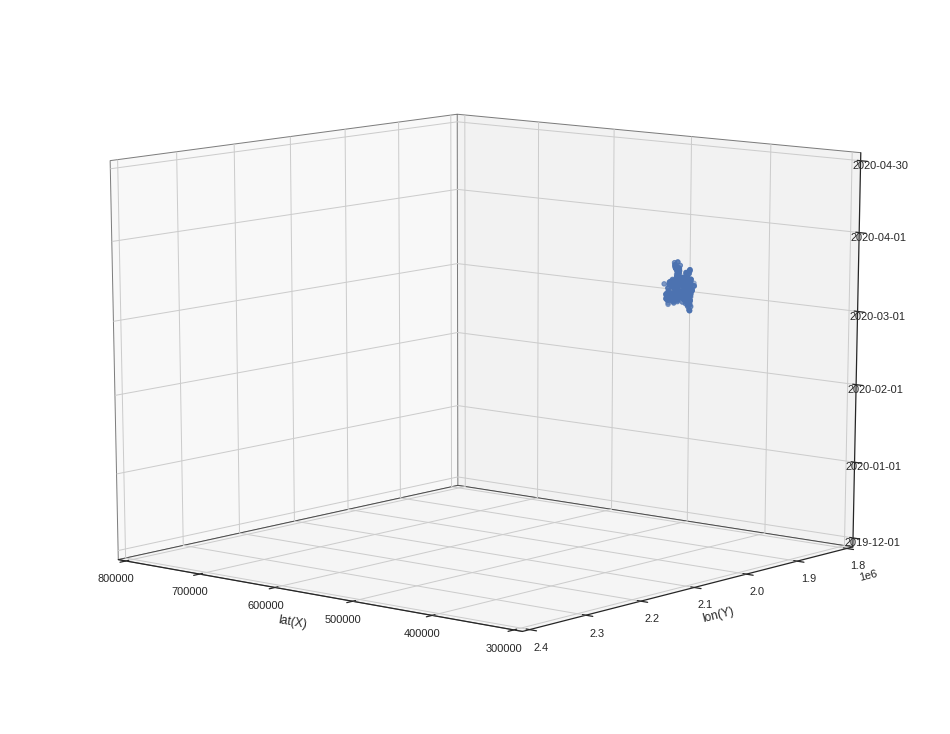

In [ ]:
fig = plt.figure(figsize=(13,10))
ax = Axes3D(fig)
ax.scatter(group_data[condition_3]['UTMx'], group_data[condition_3]['UTMy'],group_data[condition_3]['numtime'])
ax.view_init(azim=130,elev=12)
ax.set_xlim(300000,800000)
ax.set_ylim(1800000,2400000)
ax.set_zlim(0,10)
ax.set_xlabel('lat(X)')
ax.set_ylabel('lon(Y)')
ax.set_zlabel('')
ax.xaxis.pane.set_edgecolor('black')
ax.yaxis.pane.set_edgecolor('black')
ax.zaxis.pane.set_edgecolor('black')
ax.set_facecolor("white")
ax.set_zticks([1,62,124,182,244,300])
ax.set_zticklabels(['2019-12-01','2020-01-01','2020-02-01','2020-03-01','2020-04-01','2020-04-30'])
plt.show()

<function matplotlib.pyplot.show>

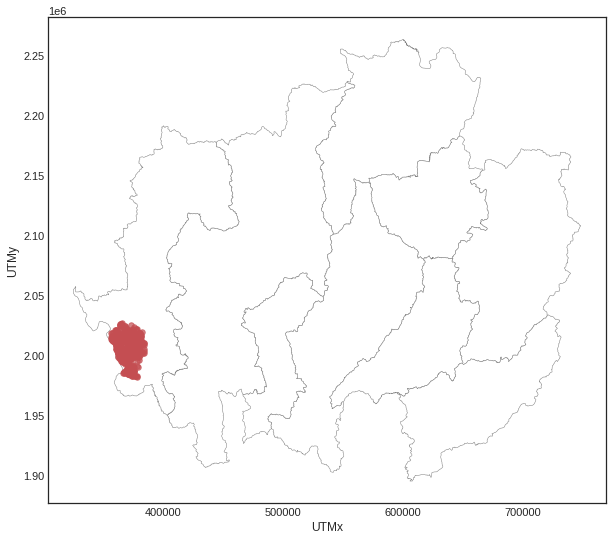

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
north_data.plot(ax=ax,color='white',linewidth=0.5,edgecolor='grey',zorder=1)
x,y = group_data[condition_3]['UTMx'].values, group_data[condition_3]['UTMy'].values
ax.scatter(x,y,color='r', alpha=0.7, zorder=5, s=30 )
plt.xlabel('UTMx') 
plt.ylabel('UTMy') 
plt.show

In [ ]:
group_3 = group_data[condition_3]
group_3

,UTMx,UTMy,numtime,UTMx_nor,UTMy_nor,NUMTIME_nor,label
27703,365334.614550,1.997398e+06,193,0.092469,0.277967,0.635762,401
27704,364923.035262,1.997333e+06,193,0.091479,0.277788,0.635762,401
27705,364868.357100,1.997708e+06,193,0.091347,0.278823,0.635762,401
27877,364829.153256,1.997763e+06,193,0.091253,0.278977,0.635762,401
27878,364773.529963,1.998138e+06,193,0.091119,0.280014,0.635762,401
...,...,...,...,...,...,...,...
46964,378127.836687,2.005380e+06,228,0.123261,0.300031,0.751656,401
46965,378618.213974,2.005308e+06,228,0.124441,0.299833,0.751656,401
48007,376561.877895,2.009073e+06,230,0.119492,0.310237,0.758278,401
48008,377003.317099,2.002542e+06,230,0.120554,0.292185,0.758278,401


เริ่มวันแรก 06/03/2020
สิ้นสุด 24/03/2020

In [ ]:
count_points_3 = group_3.groupby(['numtime']).size()
count_points_3

numtime
193      5
194      1
196      2
197      2
198      4
199      5
200      3
201     17
202     14
203     30
204     66
205     14
206    129
207      9
208     63
209      2
210     18
211     15
212      3
213     25
214     57
215     15
216     66
217      5
218     18
219     10
220      4
221      3
222     13
223      9
224     11
225     20
226     11
227      2
228      3
230      3
dtype: int64

In [ ]:
group_3.to_csv('group_3.csv')